
<a id='irfs-in-hall-model'></a>
<div id="qe-notebook-header" align="right" style="text-align:right;">
        <a href="https://quantecon.org/" title="quantecon.org">
                <img style="width:250px;display:inline;" width="250px" src="https://assets.quantecon.org/img/qe-menubar-logo.svg" alt="QuantEcon">
        </a>
</div>


<a id='index-0'></a>

# IRFs in Hall Models

## Contents

- [IRFs in Hall Models](#IRFs-in-Hall-Models)  
  - [Example 1: Hall (1978)](#Example-1:-Hall-%281978%29)  
  - [Example 2: Higher adjustment costs](#Example-2:-Higher-adjustment-costs)  
  - [Example 3: Durable Consumption Goods](#Example-3:-Durable-Consumption-Goods)  

**Co-author:** Sebastian Graves

This is another member of a suite of lectures that use the quantecon DLE class to instantiate models within the
[[HS13b]](https://lectures.quantecon.org/py/zreferences.html#hs2013) class of models described in detail in [Recursive Models of Dynamic Linear Economies](https://lectures.quantecon.org/py/hs_recursive_models.html)

In addition to what’s in Anaconda, this lecture uses the quantecon library

In [1]:
!pip install quantecon

We’ll make these imports

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from quantecon import LQ
from quantecon import DLE
%matplotlib inline

This lecture shows how the DLE class can be used to create impulse
response functions for three related economies, starting from
Hall (1978) [[Hal78]](https://lectures.quantecon.org/py/zreferences.html#hall1978)

Knowledge of the basic economic environment is assumed

See the lecture “Growth in Dynamic Linear Economies” for more details

## Example 1: Hall (1978)

First, we set parameters to make consumption (almost) follow a random
walk

We set

$$
\lambda = 0, \pi = 1, \gamma_1 = 0.1, \phi_1 = 0.00001, \delta_k = 0.95, \beta = \frac{1}{1.05}
$$

(In this example $ \delta_h $ and $ \theta_h $ are arbitrary as
household capital does not enter the equation for consumption services

We set them to values that will become useful in Example 3)

It is worth noting that this choice of parameter values ensures that
$ \beta(\gamma_1 + \delta_k) = 1 $

For simulations of this economy, we choose an initial condition of:

$$
x_0 =
   \left[ {\begin{array}{ccccc}
   5 & 150 & 1 & 0 & 0
   \end{array} }
   \right]'
$$

In [3]:
γ_1 = 0.1
γ = np.array([[γ_1], [0]])
ϕ_c = np.array([[1], [0]])
ϕ_g = np.array([[0], [1]])
ϕ_1 = 1e-5
ϕ_i = np.array([[1], [-ϕ_1]])
δ_k = np.array([[.95]])
θ_k = np.array([[1]])
β = np.array([[1 / 1.05]])
l_λ = np.array([[0]])
π_h = np.array([[1]])
δ_h = np.array([[.9]])
θ_h = np.array([[1]])
a22 = np.array([[1,   0,   0],
                [0, 0.8,   0],
                [0,   0, 0.5]])
c2 = np.array([[0, 0],
               [1, 0],
               [0, 1]])
ud = np.array([[5, 1, 0],
               [0, 0, 0]])
ub = np.array([[30, 0, 0]])
x0 = np.array([[5], [150], [1], [0], [0]])

Info1 = (a22, c2, ub, ud)
Tech1 = (ϕ_c, ϕ_g, ϕ_i, γ, δ_k, θ_k)
Pref1 = (β, l_λ, π_h, δ_h, θ_h)

These parameter values are used to define an economy of the DLE class

We can then simulate the economy for a chosen length of time, from our
initial state vector $ x_0 $

The economy stores the simulated values for each variable. Below we plot
consumption and investment:

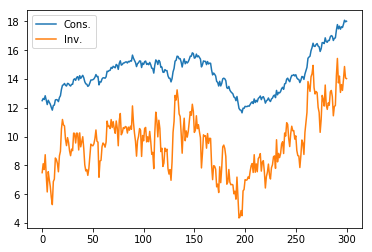

In [4]:
Econ1 = DLE(Info1, Tech1, Pref1)
Econ1.compute_sequence(x0, ts_length=300)

# This is the right panel of Fig 5.7.1 from p.105 of HS2013
plt.plot(Econ1.c[0], label='Cons.')
plt.plot(Econ1.i[0], label='Inv.')
plt.legend()
plt.show()

The DLE class can be used to create impulse response functions for each
of the endogenous variables: $ \{c_t,s_t,h_t,i_t,k_t,g_t\} $

If no selector vector for the shock is specified, the default choice is
to give IRFs to the first shock in $ w_{t+1} $

Below we plot the impulse response functions of investment and
consumption to an endowment innovation (the first shock) in the Hall
model:

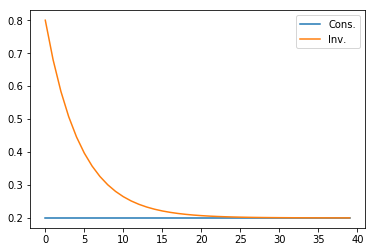

In [5]:
Econ1.irf(ts_length=40, shock=None)
# This is the left panel of Fig 5.7.1 from p.105 of HS2013
plt.plot(Econ1.c_irf, label='Cons.')
plt.plot(Econ1.i_irf, label='Inv.')
plt.legend()
plt.show()

It can be seen that the endowment shock has permanent effects on the
level of both consumption and investment, consistent with the endogenous
unit eigenvalue in this economy

Investment is much more response to the endowment shock at shorter time
horizons

## Example 2: Higher adjustment costs

We generate our next economy by making only one change to the parameters
of Example 1: we raise the parameter associated with the cost of
adjusting capital,$ \phi_1 $, from 0.00001 to 0.2

This will lower the endogenous eigenvalue that is unity in Example 1 to
a value slightly below 1

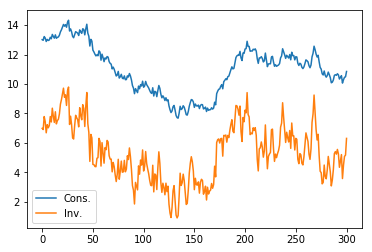

In [6]:
ϕ_12 = 0.2
ϕ_i2 = np.array([[1], [-ϕ_12]])
Tech2 = (ϕ_c, ϕ_g, ϕ_i2, γ, δ_k, θ_k)

Econ2 = DLE(Info1, Tech2, Pref1)
Econ2.compute_sequence(x0, ts_length = 300)

# This is the right panel of Fig 5.8.1 from p.106 of HS2013
plt.plot(Econ2.c[0], label='Cons.')
plt.plot(Econ2.i[0], label='Inv.')
plt.legend()
plt.show()

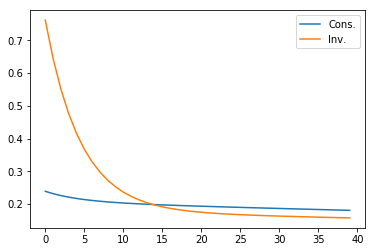

In [7]:
Econ2.irf(ts_length=40,shock=None)
# This is the left panel of Fig 5.8.1 from p.106 of HS2013
plt.plot(Econ2.c_irf,label='Cons.')
plt.plot(Econ2.i_irf,label='Inv.')
plt.legend()
plt.show()

In [8]:
Econ2.endo

array([0.9       , 0.99657126])

In [9]:
Econ2.compute_steadystate()
print(Econ2.css, Econ2.iss, Econ2.kss)

[[5.]] [[2.12173041e-12]] [[4.2434517e-11]]


The first graph shows that there seems to be a downward trend in both
consumption and investment

his is a consequence of the decrease in the largest endogenous
eigenvalue from unity in the earlier economy, caused by the higher
adjustment cost

The present economy has a nonstochastic steady state value of 5 for
consumption and 0 for both capital and investment

Because the largest endogenous eigenvalue is still close to 1, the
economy heads only slowly towards these mean values

The impulse response functions now show that an endowment shock does not
a have permanent effect on the levels of either consumption or
investment

## Example 3: Durable Consumption Goods

We generate our third economy by raising $ \phi_1 $ further, to 1.0.
We also raise the production function parameter from 0.1 to 0.15 (which
raises the non-stochastic steady state value of capital above zero)

We also change the specification of preferences to make the consumption
good *durable*

Specifically, we allow for a single durable household good obeying:

$$
h_t = \delta_h h_{t-1} + c_t \, ,  0<\delta_h<1
$$

Services are related to the stock of durables at the beginning of the
period:

$$
s_t = \lambda h_{t-1} \, ,  \lambda > 0
$$

And preferences are ordered by:

$$
- \frac{1}{2} \mathbb{E} \sum_{t=0}^\infty \beta^t [(\lambda h_{t-1} - b_t)^2 + l_t^2]|J_0
$$

To implement this, we set $ \lambda=0.1 $ and $ \pi = 0 $ (we
have already set $ \theta_h = 1 $ and $ \delta_h = 0.9 $)

We start from an initial condition that makes consumption begin near
around its non-stochastic steady state

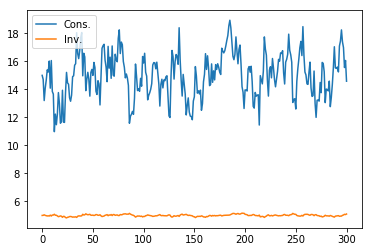

In [10]:
ϕ_13 = 1
ϕ_i3 = np.array([[1], [-ϕ_13]])

γ_12 = 0.15
γ_2 = np.array([[γ_12], [0]])

l_λ2 = np.array([[0.1]])
π_h2 = np.array([[0]])

x01 = np.array([[150], [100], [1], [0], [0]])

Tech3 = (ϕ_c, ϕ_g, ϕ_i3, γ_2, δ_k, θ_k)
Pref2 = (β, l_λ2, π_h2, δ_h, θ_h)

Econ3 = DLE(Info1, Tech3, Pref2)
Econ3.compute_sequence(x01, ts_length=300)

# This is the right panel of Fig 5.11.1 from p.111 of HS2013
plt.plot(Econ3.c[0], label='Cons.')
plt.plot(Econ3.i[0], label='Inv.')
plt.legend()
plt.show()

In contrast to Hall’s original model of Example 1, it is now investment
that is much smoother than consumption

This illustrates how making consumption goods durable tends to undo the
strong consumption smoothing result that Hall obtained

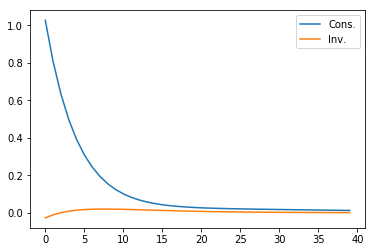

In [11]:
Econ3.irf(ts_length=40, shock=None)
# This is the left panel of Fig 5.11.1 from p.111 of HS2013
plt.plot(Econ3.c_irf, label='Cons.')
plt.plot(Econ3.i_irf, label='Inv.')
plt.legend()
plt.show()

The impulse response functions confirm that consumption is now much more
responsive to an endowment shock (and investment less so) than in
Example 1

As in Example 2, the endowment shock has permanent effects on
neither variable